<a href="https://colab.research.google.com/github/J0SAL/Labs/blob/main/SC-IT312/lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Genetic Algorithms**

In [44]:
import numpy as np
from random import randint
from prettytable import PrettyTable

Function to maximize 
F(x) = x^2 + 2x

In [45]:
# def fx(x):
#   return x**2 + 2 * x

In [46]:
def fx(x):
  return x**2

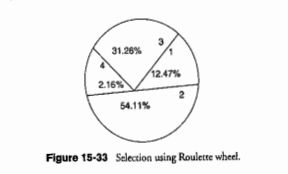

**Crossover**

In [47]:
def crossover(iter, mat_pool):
  # init_op = [2,2,3,3]
  init_op = [4,4,2,2]
  cross = []
  c_pts = []
  i = 0
  while i<len(mat_pool):
    p1 = mat_pool[i]
    p2= mat_pool[i+1]
    if iter == 0:
      cp = init_op[i]
    else:
      cp = randint(0,4)
    c_pts.append(cp)
    c_pts.append(cp)
    cross.append(p1[:cp]+p2[cp:])
    cross.append(p2[:cp]+p1[cp:])
    i+=2
  return cross, c_pts

**Mutation**

In [48]:
def mutation(iter, cross):
  # init_mut_chrom = [1,2,2,2]
  init_mut_chrom= [1,0,0,4]
  mutation_chrom = []
  if iter == 0:
    rn = init_mut_chrom
  else:
    rn = [randint(0,5) for i in range(len(pop))]

  for i in range(len(pop)):
    temp = ""
    for k in range(5):
      if k == rn[i]-1:
        temp+="1"
      else:
        temp += "0"
    mutation_chrom.append(temp)

  mutation = []
  for i in range(len(cross)):
    temp = ""
    for j in range(len(mutation_chrom[i])):
      if mutation_chrom[i][j] == "1":
        if cross[i][j] == "0":
          temp+="1"
        else:
          temp+="0"
      else:
        temp += cross[i][j]
    mutation.append(temp)
  return mutation, mutation_chrom


**Genetic**

In [49]:
# init_pop = ['00101', '00111', '01011', '10110']
init_pop = ['01100', '11001', '00101','10011']
pop = init_pop

iter = 0
while "11111" not in pop:
  x = PrettyTable()
  y = PrettyTable()
  z = PrettyTable()
  print(" --------- Iteration: ", iter, " ----------------")
  x.add_column('Populaton', pop)
  x_val = [int(i,2) for i in pop]
  x.add_column('x-val', x_val)
  fitness = [fx(i) for i in x_val]
  x.add_column('Fitness Value', fitness)
  pop_sum = sum(fitness)
  pop_avg = sum(fitness)/len(fitness)
  pop_max = max(fitness)

  # calc probability
  prob = [i/pop_sum for i in fitness]
  x.add_column('Probability', [round(p,3) for p in prob])
  x.add_column('Percentage Probability', [round(p*100, 3) for p in prob])

  # expected count 
  exp_count = [round(i/pop_avg, 3) for i in fitness]
  x.add_column('Expected Count', exp_count)

  # rounding off
  act_count = [round(i+0.1) for i in exp_count]
  x.add_column('actual Count',act_count)
  print("\n** Table 1: Selection ** \n")
  print(x, end='\n')
  print('Sum: {} Avg: {} Max: {}'.format(pop_sum, pop_avg, pop_max))

  mat_pool = []
  if iter == 0:
    for i in range(len(pop)):
      mat_pool.extend([pop[i]]*act_count[i])
  else:
    mat_pool = np.random.choice(pop,len(pop), p=prob)
  y.add_column("Mating Pool", mat_pool)

  #generating cross over offspring
  cross, c_pts = crossover(iter, mat_pool)
  y.add_column("CrossOver Points ", c_pts)
  y.add_column("Crossover", cross)

  # Calculating x valuesof offsprings
  x_val = [int(i,2) for i in cross]
  y.add_column('x-val', x_val)

  # generating fitness values for crossover
  fitness = [fx(i) for i in x_val]
  y.add_column('Fitness Values', fitness)

  print("\n** Table 2: Crossover **\n")
  print(y, end="\n")

  # generating mutation offsprings 
  mutat, mutat_chrom = mutation(iter, cross)
  z.add_column("crossover", cross)
  z.add_column("Mutation Chromosoes", mutat_chrom)
  z.add_column("Mutation", mutat)

  # generating x-val for mutation offsprings
  x_val = [int(i,2) for i in mutat]
  z.add_column("x-val", x_val)

  # generating fitness values for mutation offsprings
  fitness = [fx(i) for i in x_val]
  z.add_column("Fitness Value ", fitness)

  print("\n **Table 3: Mutation ** \n")
  print(z, end="\n")
  # assigning new mutation to population
  pop = mutat
  print()

  iter +=1


 --------- Iteration:  0  ----------------

** Table 1: Selection ** 

+-----------+-------+---------------+-------------+------------------------+----------------+--------------+
| Populaton | x-val | Fitness Value | Probability | Percentage Probability | Expected Count | actual Count |
+-----------+-------+---------------+-------------+------------------------+----------------+--------------+
|   01100   |   12  |      144      |    0.125    |         12.468         |     0.499      |      1       |
|   11001   |   25  |      625      |    0.541    |         54.113         |     2.165      |      2       |
|   00101   |   5   |       25      |    0.022    |         2.165          |     0.087      |      0       |
|   10011   |   19  |      361      |    0.313    |         31.255         |      1.25      |      1       |
+-----------+-------+---------------+-------------+------------------------+----------------+--------------+
Sum: 1155 Avg: 288.75 Max: 625

** Table 2: Crossover **


From Textbook "**Principles of Soft Computing**" -*by Sivanandam and Deepa*

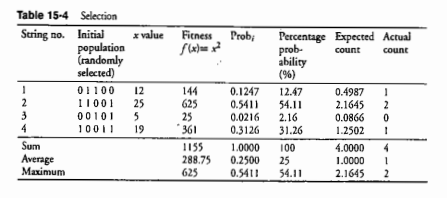

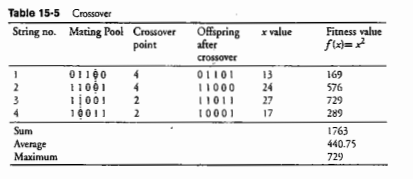

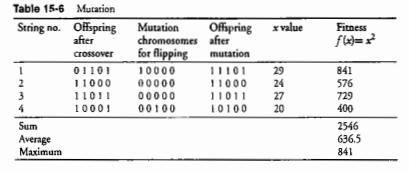